# STOCK PREDICTION USING TWITTER SENTIMENT ANALYSIS

#### importing machine learning libraries

In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

C:\Users\anubh\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


#### importing library to fetch data from twitter

In [2]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

#### setting up consumer key and access token

In [3]:
consumer_key    = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'

access_token  = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

#### Fetching tweets for United Airlines in extended mode (means entire tweet will come and not just few words + link)

In [4]:
fetch_tweets=tweepy.Cursor(api.search, q="#unitedAIRLINES",count=100, lang ="en",since="2018-9-13", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

#### Removing special character from each tweets

In [5]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.set_value(index,'Date',row["Date"])
    cdata.set_value(index,'Tweets',my_new_string)
    index=index+1
#print(cdata.dtypes)

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


#### Displaying the data with date and tweets, you can notice there are multiple tweets for each day. So we will club them together later.

In [6]:
cdata

,Date,Tweets
0,2018-11-24,RT FreezoneAruba United Airlines is planning a...
1,2018-11-24,RT STANSelections United Airlines are giving a...
2,2018-11-24,United Airlines are giving away two return eco...
3,2018-11-24,unitedAIRLINES UnitedMunoz CEO Munoz Wanna lea...
4,2018-11-24,AviationUnitedAirlines B777ER Call Sign UA21 f...
5,2018-11-24,RT JaspreetUnited UA15 departing London Heathr...
6,2018-11-24,RT JaspreetUnited UA15 departing London Heathr...
7,2018-11-24,UA15 departing London Heathrow for Newark avg...
8,2018-11-24,United Airlines Enhances Transcontinental Sche...
9,2018-11-24,UnitedaNYC We launched a roaming UnitedAirline...


#### Creating a dataframe where we will combine the tweets date wise and store into

In [7]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [8]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.set_value(indx,'Date',get_date)
        ccdata.set_value(indx,'Tweets',get_tweet)
        indx=indx+1
        get_tweet=" "

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


#### All the tweets has been clubbed as per their date.

In [9]:
ccdata

,Date,Tweets
0,2018-11-24,RT FreezoneAruba United Airlines is planning a...
1,2018-11-23,RT AngeliqueK Is anyone satisfied with flying...
2,2018-11-22,RT UnitedFlyerHD Beautiful view of Chicago at...
3,2018-11-21,Instead of Turkey I am eating pasta for thank...
4,2018-11-20,united 150 for unaccompanied minor service yo...
5,2018-11-19,united Thank you for damaging and taking my n...
6,2018-11-18,unitedairlines operations team very inconside...
7,2018-11-17,unitedAIRLINES stop blaming snow in denver Th...
8,2018-11-16,Another 2 United flights delayed Whilst on th...
9,2018-11-15,ABCWorldNews really we are stuck in a plane b...


#### Now to know the "closing price" of each day we will import STOCK PRICE DATA for UNITED AIRLINES from "yahoo.finance". We will consider "Close" price only.

In [10]:
read_stock_p=pd.read_csv('UAL.csv')
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-22,87.839996,89.230003,87.339996,88.610001,88.610001,3820100
1,2018-10-23,87.019997,87.610001,84.440002,86.330002,86.330002,5809000
2,2018-10-24,86.070000,86.709999,81.919998,82.190002,82.190002,5220800
3,2018-10-25,82.690002,86.269997,82.480003,85.599998,85.599998,4328600
4,2018-10-26,84.099998,85.580002,82.839996,84.629997,84.629997,3364300
5,2018-10-29,85.980003,86.949997,83.919998,84.989998,84.989998,3902000
6,2018-10-30,84.379997,86.250000,84.379997,85.849998,85.849998,4363200
7,2018-10-31,87.250000,87.699997,85.370003,85.510002,85.510002,3796500
8,2018-11-01,85.620003,88.470001,85.620003,88.040001,88.040001,3398900
9,2018-11-02,88.470001,90.279999,88.010002,88.680000,88.680000,3335900


#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.

In [11]:
ccdata['Prices']=""

In [12]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            break

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


#### Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [13]:
ccdata

,Date,Tweets,Prices
0,2018-11-24,RT FreezoneAruba United Airlines is planning a...,
1,2018-11-23,RT AngeliqueK Is anyone satisfied with flying...,
2,2018-11-22,RT UnitedFlyerHD Beautiful view of Chicago at...,
3,2018-11-21,Instead of Turkey I am eating pasta for thank...,92
4,2018-11-20,united 150 for unaccompanied minor service yo...,91
5,2018-11-19,united Thank you for damaging and taking my n...,92
6,2018-11-18,unitedairlines operations team very inconside...,
7,2018-11-17,unitedAIRLINES stop blaming snow in denver Th...,
8,2018-11-16,Another 2 United flights delayed Whilst on th...,92
9,2018-11-15,ABCWorldNews really we are stuck in a plane b...,91


#### So we take the mean for the close price and put it in the blank value

In [14]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

#### Now all the entries have some value

In [15]:
ccdata

,Date,Tweets,Prices
0,2018-11-24,RT FreezoneAruba United Airlines is planning a...,91
1,2018-11-23,RT AngeliqueK Is anyone satisfied with flying...,91
2,2018-11-22,RT UnitedFlyerHD Beautiful view of Chicago at...,91
3,2018-11-21,Instead of Turkey I am eating pasta for thank...,92
4,2018-11-20,united 150 for unaccompanied minor service yo...,91
5,2018-11-19,united Thank you for damaging and taking my n...,92
6,2018-11-18,unitedairlines operations team very inconside...,91
7,2018-11-17,unitedAIRLINES stop blaming snow in denver Th...,91
8,2018-11-16,Another 2 United flights delayed Whilst on th...,92
9,2018-11-15,ABCWorldNews really we are stuck in a plane b...,91


#### Making "prices" column as integer so mathematical operations could be performed easily.

In [16]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

#### Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [17]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2018-11-24,RT FreezoneAruba United Airlines is planning a...,91,,,,
1,2018-11-23,RT AngeliqueK Is anyone satisfied with flying...,91,,,,
2,2018-11-22,RT UnitedFlyerHD Beautiful view of Chicago at...,91,,,,
3,2018-11-21,Instead of Turkey I am eating pasta for thank...,92,,,,
4,2018-11-20,united 150 for unaccompanied minor service yo...,91,,,,
5,2018-11-19,united Thank you for damaging and taking my n...,92,,,,
6,2018-11-18,unitedairlines operations team very inconside...,91,,,,
7,2018-11-17,unitedAIRLINES stop blaming snow in denver Th...,91,,,,
8,2018-11-16,Another 2 United flights delayed Whilst on th...,92,,,,
9,2018-11-15,ABCWorldNews really we are stuck in a plane b...,91,,,,


#### Downloading this package was essential to perform sentiment analysis.

In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### This part of the code is responsible for assigning the polarity for each statement. That is how much positive, negative, neutral you statement is. And also assign the compound value that is overall sentiment of the statement.

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [20]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2018-11-24,RT FreezoneAruba United Airlines is planning a...,91,0.9939,0.057,0.789,0.155
1,2018-11-23,RT AngeliqueK Is anyone satisfied with flying...,91,0.9992,0.026,0.825,0.149
2,2018-11-22,RT UnitedFlyerHD Beautiful view of Chicago at...,91,0.9997,0.029,0.752,0.218
3,2018-11-21,Instead of Turkey I am eating pasta for thank...,92,0.9995,0.026,0.786,0.188
4,2018-11-20,united 150 for unaccompanied minor service yo...,91,0.9975,0.079,0.778,0.142
5,2018-11-19,united Thank you for damaging and taking my n...,92,0.9993,0.069,0.769,0.162
6,2018-11-18,unitedairlines operations team very inconside...,91,-0.985,0.143,0.738,0.119
7,2018-11-17,unitedAIRLINES stop blaming snow in denver Th...,91,-0.9678,0.156,0.701,0.143
8,2018-11-16,Another 2 United flights delayed Whilst on th...,92,0.9996,0.129,0.691,0.18
9,2018-11-15,ABCWorldNews really we are stuck in a plane b...,91,0.9994,0.08,0.762,0.159


#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.

% of positive tweets=  81.81818181818183
% of negative tweets=  18.181818181818183


[]

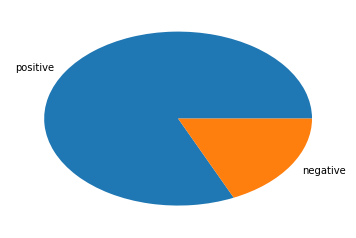

In [21]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

#### Making a new dataframe with necessary columns for providing machine learning.

In [22]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [23]:
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2018-11-24,91,0.9939,0.057,0.789,0.155
1,2018-11-23,91,0.9992,0.026,0.825,0.149
2,2018-11-22,91,0.9997,0.029,0.752,0.218
3,2018-11-21,92,0.9995,0.026,0.786,0.188
4,2018-11-20,91,0.9975,0.079,0.778,0.142
5,2018-11-19,92,0.9993,0.069,0.769,0.162
6,2018-11-18,91,-0.985,0.143,0.738,0.119
7,2018-11-17,91,-0.9678,0.156,0.701,0.143
8,2018-11-16,92,0.9996,0.129,0.691,0.18
9,2018-11-15,91,0.9994,0.08,0.762,0.159


#### Dividing the dataset into train and test.

In [24]:
train_start_index = '0'
train_end_index = '6'
test_start_index = '7'
test_end_index = '9'
train = df_.ix[train_start_index : train_end_index]
test = df_.ix[test_start_index:test_end_index]

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


#### Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [25]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [26]:
print(numpy_df_train)

[[0.057 0.155]
 [0.026 0.149]
 [0.029 0.218]
 [0.026 0.188]
 [0.079 0.142]
 [0.069 0.162]
 [0.143 0.119]]


#### Making a 2D array that will store the Negative and Positive sentiment for Testing dataset.

In [27]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [28]:
print(numpy_df_test)

[[0.156 0.143]
 [0.129 0.18 ]
 [0.08  0.159]
 [0.062 0.134]]


#### Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same.

In [29]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
0      91
1      91
2      91
3      92
4      91
5      92
6      91


#### Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value (like class-lables in iris dataset))

In [30]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Making Predictions

In [31]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [32]:
print(prediction)

[91.  91.4 91.4 91. ]


#### Importing matplotlib library for plotting graph

In [33]:
import matplotlib.pyplot as plt

#### Defining index position for the test data. Making dataframe for the predicted value.

In [34]:
idx=np.arange(int(test_start_index),int(test_end_index)+2)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [35]:
predictions_df_

,Prices
7,91.0
8,91.4
9,91.4
10,91.0


#### Plotting the graph for the Predicted_price VS Actual Price

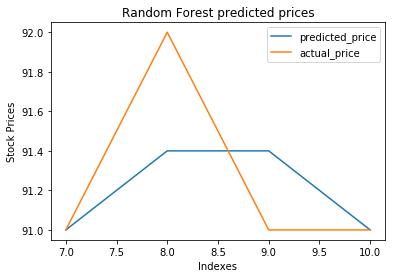

In [36]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

### NOTE: Since our dataset is very small and as you can see that fetching 600 tweets could only make data for just 10 days.Also the prediction is not very great in such small dataset. So we found this new dataset on internet which has the Text as "Tweets" and respective "close price" and "Adjusted close price".


### Adjusted Close Price: An adjusted closing price is a stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time before the next day's open.

In [37]:
stocks_dataf = pd.read_pickle('C:\\Users\\anubh\\OneDrive\\Desktop\\Twitter_Dataset.pkl')
stocks_dataf.columns=['closing_price','adj_close_price','Tweets']

## New dataset

In [38]:
stocks_dataf

,closing_price,adj_close_price,Tweets
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
2007-01-06,12406.503255,12406.503255,. A Status Quo Secretary General. Best Buy and...
2007-01-07,12414.996745,12414.996745,. THE COMMON APPLICATION; Typo.com. Jumbo Bonu...
2007-01-08,12423.490234,12423.490234,. VW Group’s Sales Rose Sharply in 2006. Conso...
2007-01-09,12416.599609,12416.599609,. The Claim: Hot Leftovers Should Cool at Roo...
2007-01-10,12442.160156,12442.160156,. Love Among the Ruins. Dell Says Plant a Tree...


#### Removing dot (.) and space from the Tweets

In [39]:
stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
stocks_dataf = stocks_dataf[['adj_close_price', 'Tweets']]
stocks_dataf['Tweets'] = stocks_dataf['Tweets'].map(lambda x: x.lstrip('.-'))
stocks_dataf

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,adj_close_price,Tweets
2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...
2007-01-06,12406,A Status Quo Secretary General. Best Buy and ...
2007-01-07,12414,THE COMMON APPLICATION; Typo.com. Jumbo Bonus...
2007-01-08,12423,VW Group’s Sales Rose Sharply in 2006. Consol...
2007-01-09,12416,The Claim: Hot Leftovers Should Cool at Room...
2007-01-10,12442,"Love Among the Ruins. Dell Says Plant a Tree,..."


Making new dataframe and only considering "Adjusted close price". And date as index vlaue.

In [40]:
dataframe = stocks_dataf[['adj_close_price']].copy()

In [41]:
dataframe["Comp"] = ''
dataframe["Negative"] = ''
dataframe["Neutral"] = ''
dataframe["Positive"] = ''
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive
2007-01-01,12469,,,,
2007-01-02,12472,,,,
2007-01-03,12474,,,,
2007-01-04,12480,,,,
2007-01-05,12398,,,,
2007-01-06,12406,,,,
2007-01-07,12414,,,,
2007-01-08,12423,,,,
2007-01-09,12416,,,,
2007-01-10,12442,,,,


In [42]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in stocks_dataf.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', stocks_dataf.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        dataframe.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        dataframe.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        dataframe.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        dataframe.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [44]:
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8179,0.114,0.787,0.099
2007-01-03,12474,-0.9993,0.198,0.737,0.065
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082
2007-01-06,12406,-0.965,0.134,0.771,0.094
2007-01-07,12414,-0.9975,0.193,0.739,0.069
2007-01-08,12423,-0.9601,0.11,0.793,0.097
2007-01-09,12416,-0.9953,0.103,0.848,0.049
2007-01-10,12442,-0.9534,0.134,0.743,0.123


% of positive tweets=  45.414727621133316
% of negative tweets=  54.39364905557076


[]

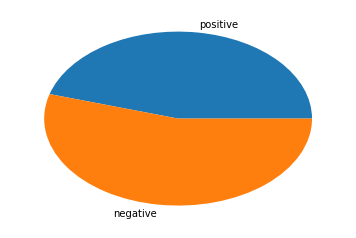

In [45]:
posi=0
nega=0
for i in range (0,len(dataframe)):
    get_val=dataframe.Comp[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(dataframe)))*100
negper=(nega/(len(dataframe)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [46]:
train_data_start = '2007-01-01'
train_data_end = '2012-12-31'
test_data_start = '2013-01-01'
test_data_end = '2016-12-31'
train = dataframe.ix[train_data_start : train_data_end]
test = dataframe.ix[test_data_start:test_data_end]
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Positive']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Positive']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [47]:
y_train = pd.DataFrame(train['adj_close_price'])
y_test = pd.DataFrame(test['adj_close_price'])

## TRAIN USING LOGISTIC REGRESSION

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


ACCURACY=  0.0205761316872428
ACCURACY=  0.02459016393442623
ACCURACY=  0.0205761316872428
ACCURACY=  0.012345679012345678
ACCURACY=  0.0205761316872428
ACCURACY=  0.02459016393442623
ACCURACY=  0.01646090534979424
ACCURACY=  0.01646090534979424
ACCURACY=  0.0205761316872428
ACCURACY=  0.01639344262295082


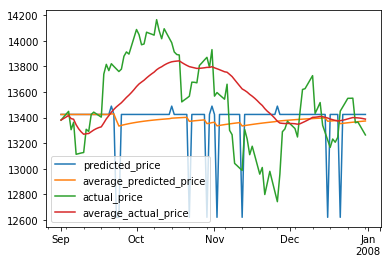

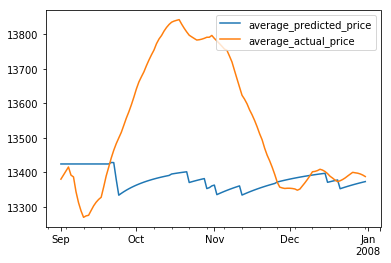

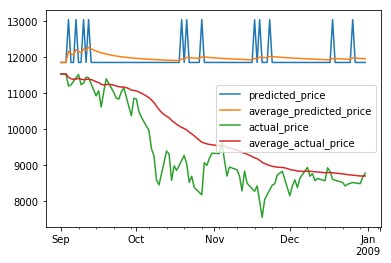

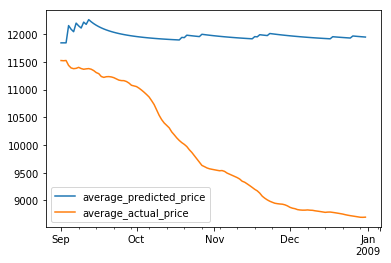

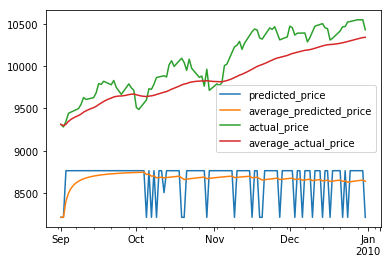

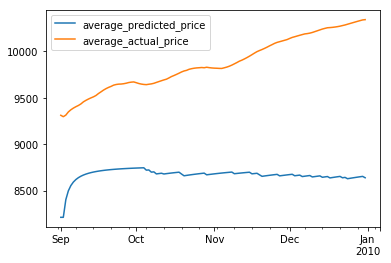

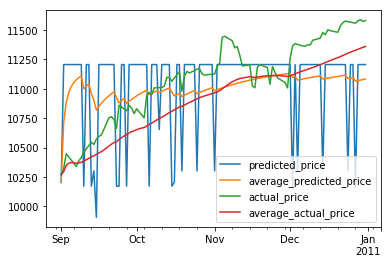

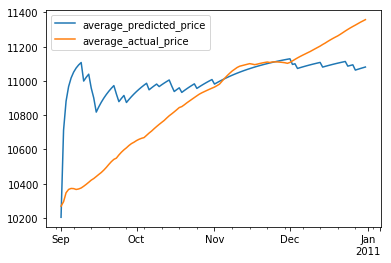

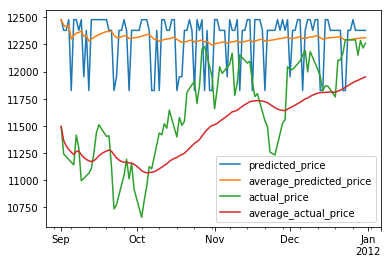

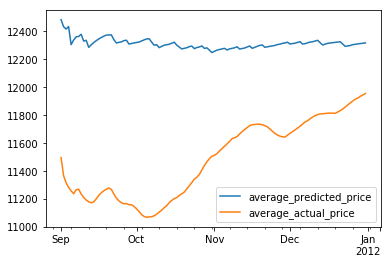

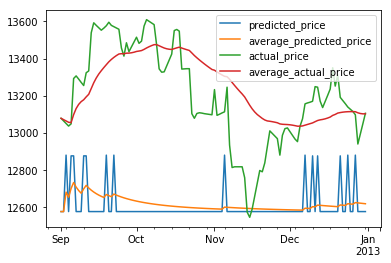

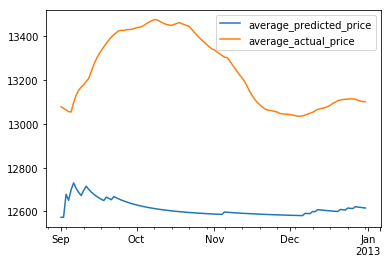

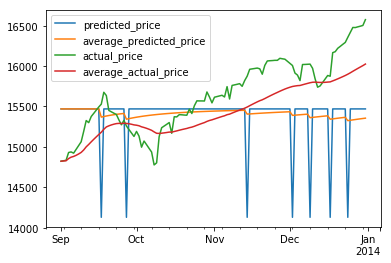

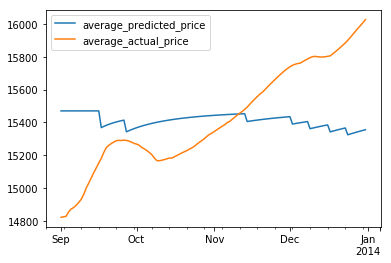

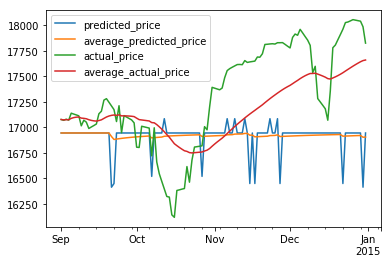

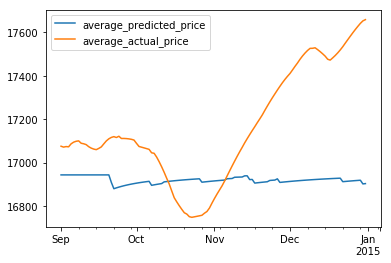

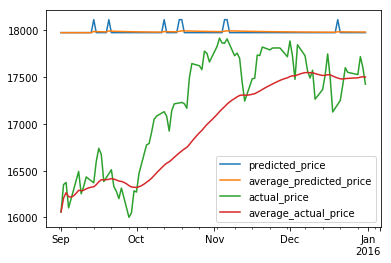

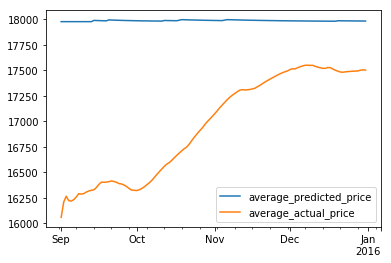

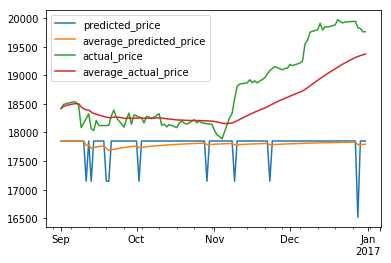

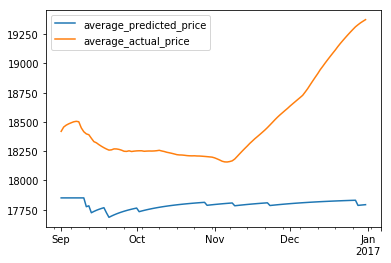

In [48]:
from treeinterpreter import treeinterpreter as tree_interpreter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    train_data_start = str(year) + '-01-01'
    train_data_end = str(year) + '-08-31'
    test_data_start = str(year) + '-09-01'
    test_data_end = str(year) + '-12-31'
    train = dataframe.ix[train_data_start : train_data_end]
    test = dataframe.ix[test_data_start:test_data_end]
    
    list_of_sentiments_score = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_train = np.asarray(list_of_sentiments_score)
    list_of_sentiments_score = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_test = np.asarray(list_of_sentiments_score)

    lr = LogisticRegression()
    lr.fit(numpy_dataframe_train, train['adj_close_price'])

    prediction = lr.predict(numpy_dataframe_test)
    prediction_list.append(prediction)
    print("ACCURACY= ",lr.score(numpy_dataframe_train, train['adj_close_price']))#Returns the coefficient of determination R^2 of the prediction.
    idx = pd.date_range(test_data_start, test_data_end)
    predictions_dataframe_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
    
    #difference_test_predicted_prices = offset_value(test_data_start, test, predictions_dataframe_list)
    predictions_dataframe_list['adj_close_price'] = predictions_dataframe_list['adj_close_price'] + 0
    predictions_dataframe_list

    predictions_dataframe_list['ewma'] = np.array(predictions_dataframe_list["adj_close_price"].ewm(span=60).mean())
    predictions_dataframe_list['actual_value'] = test['adj_close_price']
    predictions_dataframe_list['actual_value_ewma'] = np.array(predictions_dataframe_list["actual_value"].ewm(span=60).mean())
    predictions_dataframe_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_dataframe_list.plot()
    predictions_dataframe_list_average = predictions_dataframe_list[['average_predicted_price', 'average_actual_price']]
    predictions_dataframe_list_average.plot()

## TRAIN USING RANDOM FOREST REGRESSOR

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


ACCURACY=  0.7812104087695496


C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


ACCURACY=  0.7907963502143737


C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


ACCURACY=  0.7648984054170131


C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


ACCURACY=  0.7384282257160395


C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


ACCURACY=  0.7744737378021398


C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


ACCURACY=  0.8065784984274926


C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


ACCURACY=  0.803598507129801
ACCURACY=  0.7629592308668713


C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15:

ACCURACY=  0.7361537404682459
ACCURACY=  0.7870740457815835


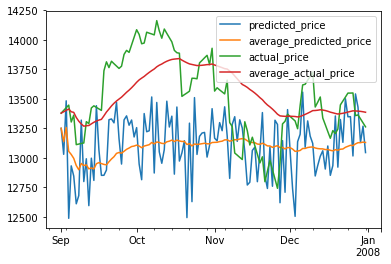

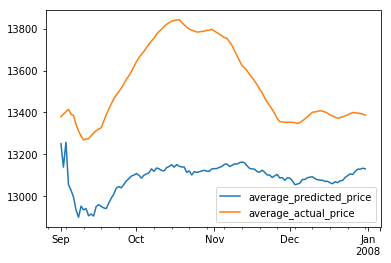

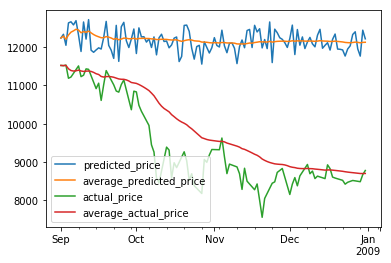

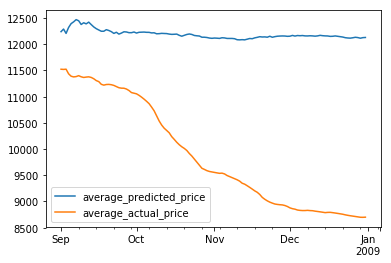

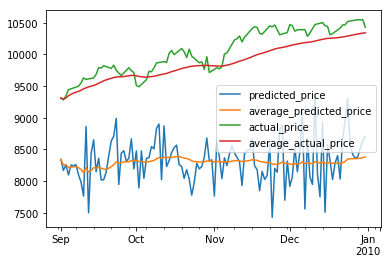

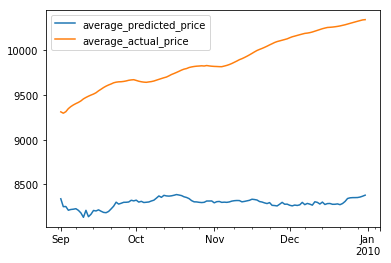

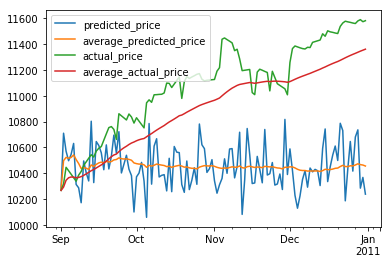

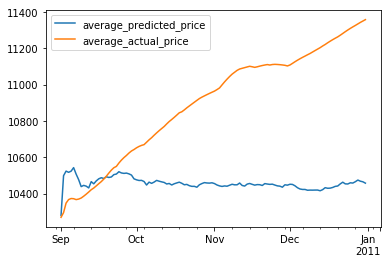

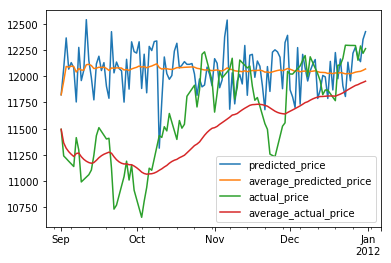

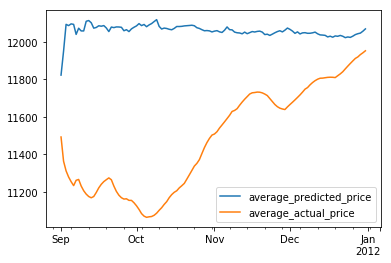

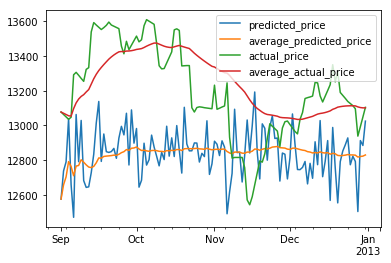

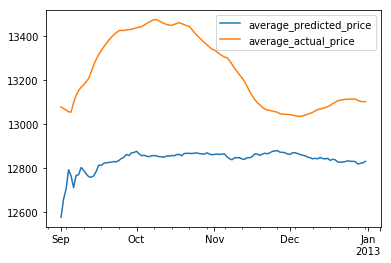

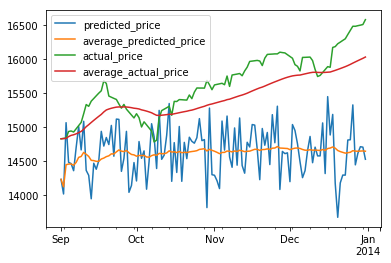

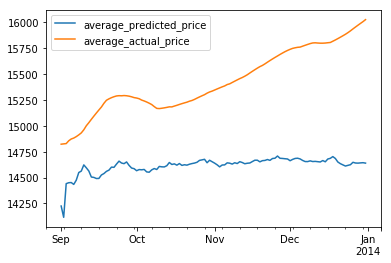

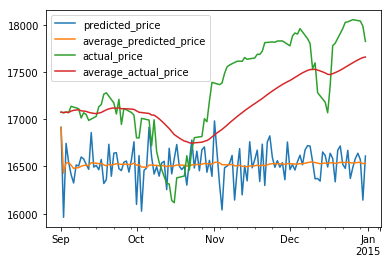

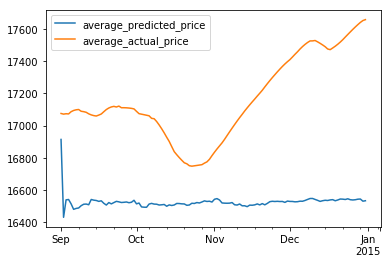

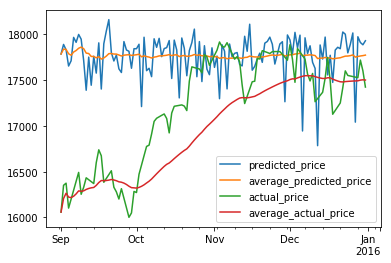

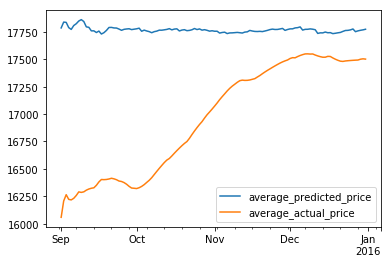

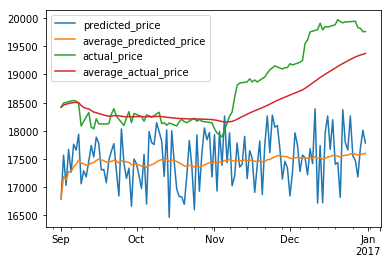

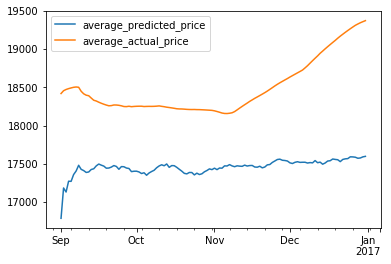

In [49]:
from treeinterpreter import treeinterpreter as tree_interpreter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    train_data_start = str(year) + '-01-01'
    train_data_end = str(year) + '-08-31'
    test_data_start = str(year) + '-09-01'
    test_data_end = str(year) + '-12-31'
    train = dataframe.ix[train_data_start : train_data_end]
    test = dataframe.ix[test_data_start:test_data_end]
    
    list_of_sentiments_score = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_train = np.asarray(list_of_sentiments_score)
    list_of_sentiments_score = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_test = np.asarray(list_of_sentiments_score)
    
    rf = RandomForestRegressor(random_state=25)
    rf.fit(numpy_dataframe_train, train['adj_close_price'])
    
    prediction, bias, contributions = tree_interpreter.predict(rf, numpy_dataframe_test)
    prediction_list.append(prediction)
    print("ACCURACY= ",rf.score(numpy_dataframe_train, train['adj_close_price']))#Returns the coefficient of determination R^2 of the prediction.
    idx = pd.date_range(test_data_start, test_data_end)
    predictions_dataframe_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
    
    #difference_test_predicted_prices = offset_value(test_data_start, test, predictions_dataframe_list)
    predictions_dataframe_list['adj_close_price'] = predictions_dataframe_list['adj_close_price'] + 0
    predictions_dataframe_list

    predictions_dataframe_list['ewma'] = np.array(predictions_dataframe_list["adj_close_price"].ewm(span=60).mean())
    predictions_dataframe_list['actual_value'] = test['adj_close_price']
    predictions_dataframe_list['actual_value_ewma'] = np.array(predictions_dataframe_list["actual_value"].ewm(span=60).mean())
    predictions_dataframe_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_dataframe_list.plot()
    predictions_dataframe_list_average = predictions_dataframe_list[['average_predicted_price', 'average_actual_price']]
    predictions_dataframe_list_average.plot()

## TRAIN USING MLPC CLASSIFIER (Multi-layer Perceptron classifier) - Neural Network

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


ACCURACY=  0.06584362139917696
ACCURACY=  0.13114754098360656
ACCURACY=  0.10699588477366255
ACCURACY=  0.13991769547325103
ACCURACY=  0.09876543209876543
ACCURACY=  0.040983606557377046
ACCURACY=  0.1111111111111111
ACCURACY=  0.1111111111111111
ACCURACY=  0.06995884773662552
ACCURACY=  0.09836065573770492


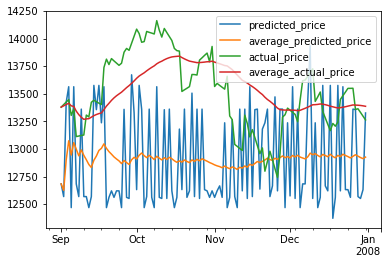

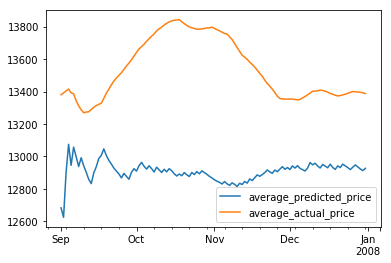

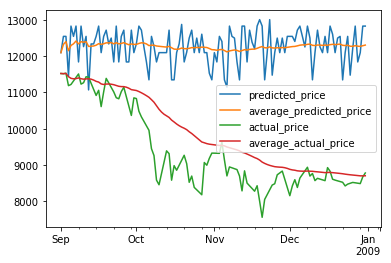

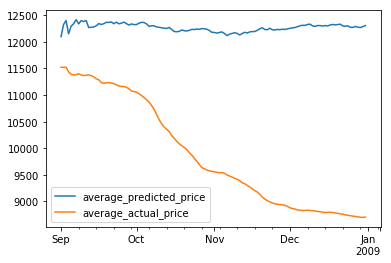

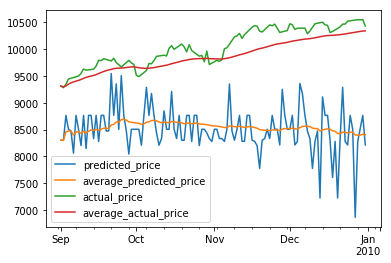

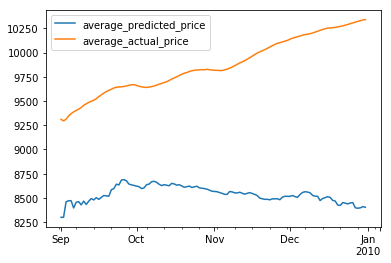

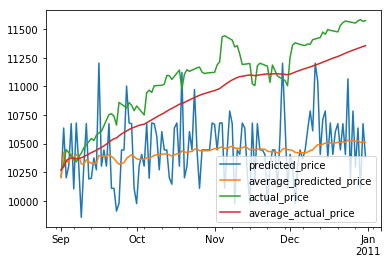

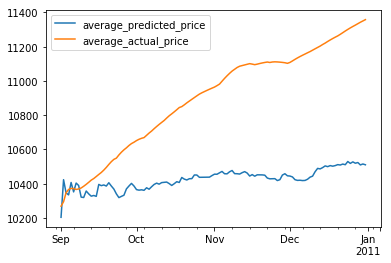

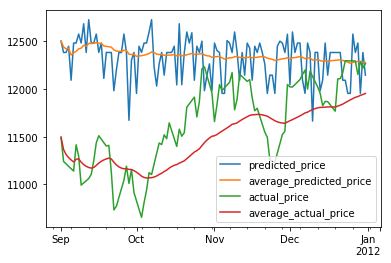

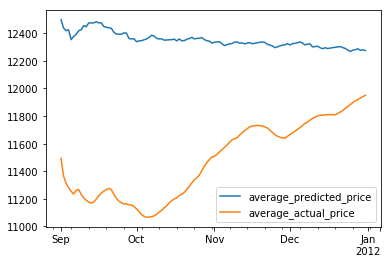

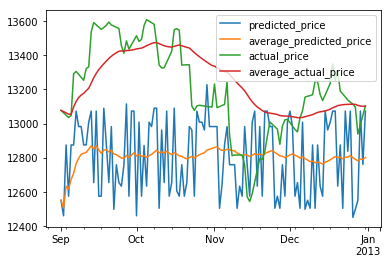

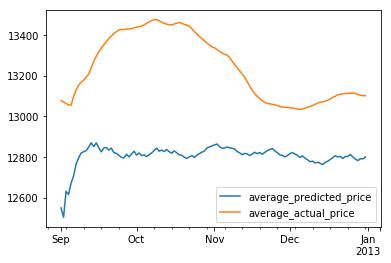

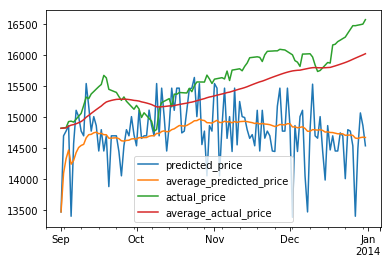

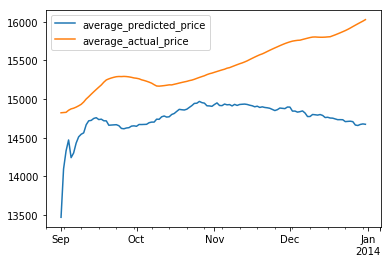

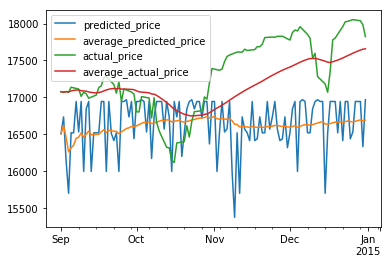

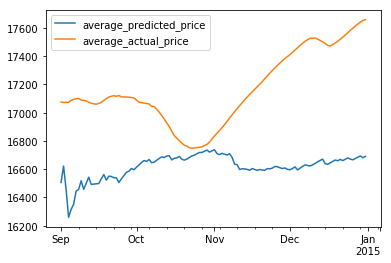

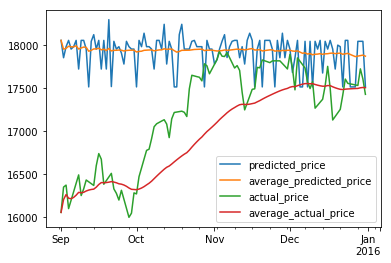

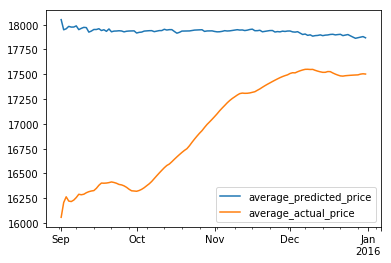

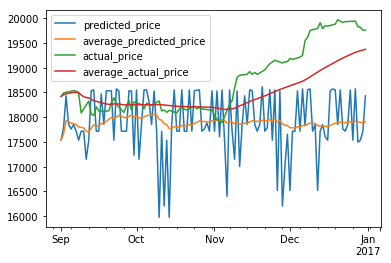

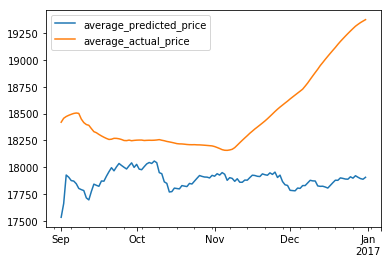

In [50]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta
"""Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent."""
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    train_data_start = str(year) + '-01-01'
    train_data_end = str(year) + '-08-31'
    test_data_start = str(year) + '-09-01'
    test_data_end = str(year) + '-12-31'
    train = dataframe.ix[train_data_start : train_data_end]
    test = dataframe.ix[test_data_start:test_data_end]
    
    list_of_sentiments_score = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_train = np.asarray(list_of_sentiments_score)
    list_of_sentiments_score = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_test = np.asarray(list_of_sentiments_score)
    
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', #'relu', the rectified linear unit function
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
    """Hidden_Layer_Sizes: tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of Neutralrons in the ith
    hidden layer."""
    mlpc.fit(numpy_dataframe_train, train['adj_close_price'])   
    prediction = mlpc.predict(numpy_dataframe_test)
    
    prediction_list.append(prediction)
    print("ACCURACY= ",mlpc.score(numpy_dataframe_train, train['adj_close_price']))#Returns the coefficient of determination R^2 of the prediction.
    idx = pd.date_range(test_data_start, test_data_end)
    predictions_dataframe_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
    
    #difference_test_predicted_prices = offset_value(test_data_start, test, predictions_dataframe_list)
    predictions_dataframe_list['adj_close_price'] = predictions_dataframe_list['adj_close_price'] + 0
    predictions_dataframe_list
    predictions_dataframe_list['ewma'] = np.array(predictions_dataframe_list["adj_close_price"].ewm(span=60).mean())
    predictions_dataframe_list['actual_value'] = test['adj_close_price']
    predictions_dataframe_list['actual_value_ewma'] = np.array(predictions_dataframe_list["actual_value"].ewm(span=60).mean())
    predictions_dataframe_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_dataframe_list.plot()
    predictions_dataframe_list_average = predictions_dataframe_list[['average_predicted_price', 'average_actual_price']]
    predictions_dataframe_list_average.plot()


## FINALLY MAKING PREDICTION ON UNTRAINED TRAINING DATA AND PLOTTING GRAPH

### RANDOM FOREST REGRESSOR

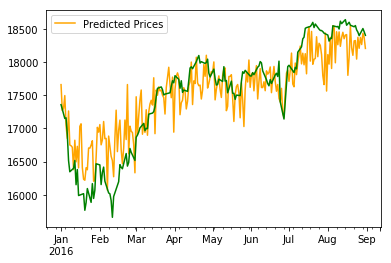

In [51]:
prediction, bias, contributions = tree_interpreter.predict(rf, numpy_dataframe_train)
idx = pd.date_range(train_data_start, train_data_end)
predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Prices'])
predictions_dataframe1.plot(color='orange')
train['adj_close_price'].plot.line(color='green')

### LOGISTIC REGRESSION

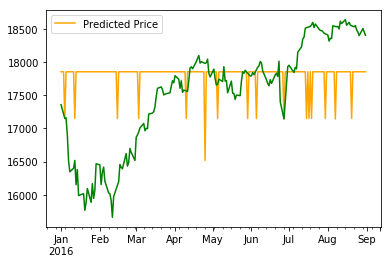

In [52]:
prediction = lr.predict(numpy_dataframe_train)
#print("ACCURACY= ",lr.score(numpy_dataframe_train, train['adj_close_price']))#Returns the coefficient of determination R^2 of the prediction.
idx = pd.date_range(train_data_start, train_data_end)
predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])
predictions_dataframe1.plot(color='orange')
train['adj_close_price'].plot.line(color='green')


### MLPC CLASSIFIER (Multi-layer Perceptron classifier) - Neural Network

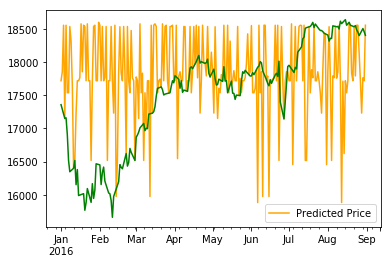

In [53]:
prediction = mlpc.predict(numpy_dataframe_train)
#print("ACCURACY= ",mlpc.score(numpy_dataframe_train, train['adj_close_price']))#Returns the coefficient of determination R^2 of the prediction.
idx = pd.date_range(train_data_start, train_data_end)
predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])
predictions_dataframe1.plot(color='orange')
train['adj_close_price'].plot.line(color='green')